In [102]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [103]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [104]:
X_train.shape

(60000, 28, 28)

In [105]:
X_test.shape

(10000, 28, 28)

In [106]:
single_image= X_train[1500]


In [107]:
single_image.shape
     

(28, 28)

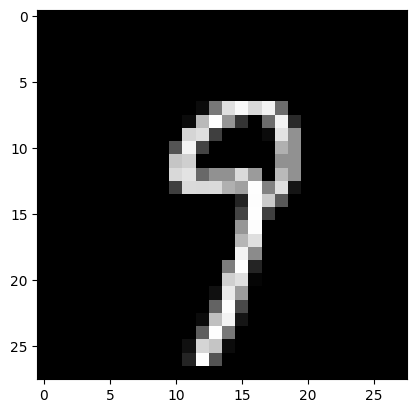

In [108]:
plt.imshow(single_image,cmap='gray')

In [109]:
y_train.shape

(60000,)

In [110]:

X_train.min()

0

In [111]:
X_train.max()


255

In [112]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [113]:
X_train_scaled.min()


0.0

In [114]:
X_train_scaled.max()


1.0

In [115]:
y_train[0]


5

In [116]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [117]:
type(y_train_onehot)

numpy.ndarray

In [118]:
y_train_onehot.shape

(60000, 10)

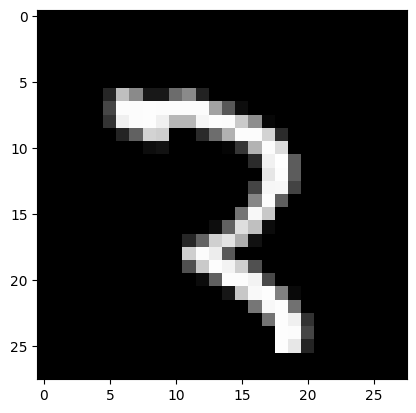

In [119]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [120]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [121]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [122]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))

In [123]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 21632)             0         
                                                                 
 dense_8 (Dense)             (None, 16)                346128    
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 347,578
Trainable params: 347,578
Non-trainable params: 0
________________________________________________

In [124]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [125]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 75s 79ms/step - loss: 0.2610 - accuracy: 0.9423 - val_loss: 0.0977 - val_accuracy: 0.9764
Epoch 2/5
938/938 [==============================] - 75s 79ms/step - loss: 0.0789 - accuracy: 0.9793 - val_loss: 0.0683 - val_accuracy: 0.9811
Epoch 3/5
938/938 [==============================] - 69s 74ms/step - loss: 0.0533 - accuracy: 0.9856 - val_loss: 0.0650 - val_accuracy: 0.9797
Epoch 4/5
938/938 [==============================] - 72s 76ms/step - loss: 0.0397 - accuracy: 0.9896 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 5/5
938/938 [==============================] - 69s 73ms/step - loss: 0.0295 - accuracy: 0.9925 - val_loss: 0.0489 - val_accuracy: 0.9849


In [126]:
metrics = pd.DataFrame(model.history.history)


In [127]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.261047,0.942317,0.097687,0.9764
1,0.078934,0.979317,0.068331,0.9811
2,0.053271,0.985583,0.065009,0.9797
3,0.039693,0.989617,0.056117,0.9831
4,0.029467,0.992483,0.048944,0.9849


<Axes: >

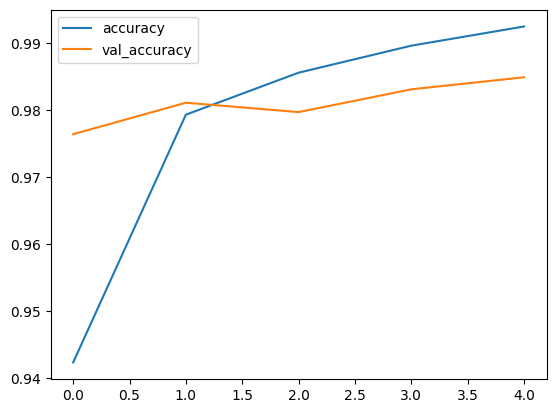

In [128]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

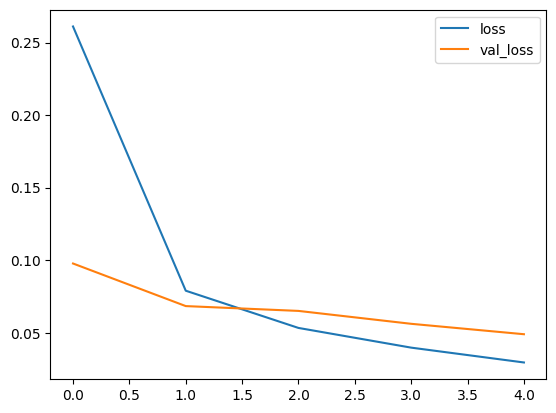

In [129]:
metrics[['loss','val_loss']].plot()

In [130]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [131]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 971    0    1    1    1    2    2    1    1    0]
 [   0 1129    0    3    0    0    1    1    1    0]
 [   3    3 1005    9    1    0    0    8    3    0]
 [   0    0    1 1004    0    1    0    1    2    1]
 [   0    0    0    0  972    0    0    0    2    8]
 [   1    0    0    9    0  878    3    0    1    0]
 [   5    3    0    0    2    4  942    0    2    0]
 [   0    1    7    3    0    0    0 1014    1    2]
 [   3    0    1    6    1    3    0    1  951    8]
 [   2    0    0    3    6    5    0    6    4  983]]


In [132]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [133]:
img = image.load_img('/content/9.png')

In [134]:
type(img)

PIL.Image.Image

In [135]:

img = image.load_img('9.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [136]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 27ms/step


In [137]:
print(x_single_prediction)

[9]


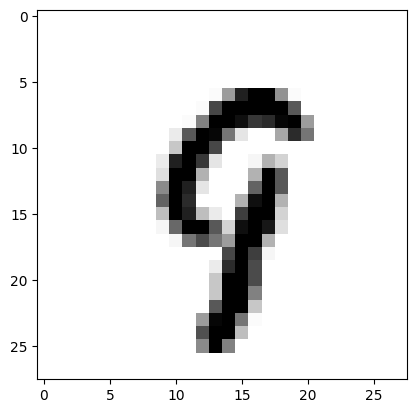

In [138]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [139]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [140]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 28ms/step


In [141]:
print(x_single_prediction)


[9]
